# travelTime Analysis

Different analyses of data collected using https://github.com/amadeuspzs/travelTime/blob/master/travelTime.py

In [41]:
%matplotlib inline
import pandas as pd, math, matplotlib.pyplot as plt, matplotlib.dates as dates
from datetime import datetime
from utils import find_weeks, find_days # custom
from pytz import timezone

## Load data

In [42]:
filename = 'data/home-montauk.csv'
data = pd.read_csv(filename)
data.head(5)

,Timestamp,Duration(s)
0,1498920001,9472
1,1498920602,9498
2,1498921202,9646
3,1498921801,9698
4,1498922401,9679


Convert the unix timestamp to a datetime object:

In [43]:
data['Timestamp']=data.apply(lambda row: datetime.fromtimestamp(int(row['Timestamp']),timezone('US/Eastern')),axis=1)
data.head(5)

,Timestamp,Duration(s)
0,2017-07-01 10:40:01-04:00,9472
1,2017-07-01 10:50:02-04:00,9498
2,2017-07-01 11:00:02-04:00,9646
3,2017-07-01 11:10:01-04:00,9698
4,2017-07-01 11:20:01-04:00,9679


Add a new column with the duration in hours

In [69]:
data['Duration(h)']=data.apply(lambda row: float(row['Duration(s)'])/(60*60),axis=1)
data.head(5)

,Timestamp,Duration(s),Duration(h)
0,2017-07-01 10:40:01-04:00,9472,2.631111
1,2017-07-01 10:50:02-04:00,9498,2.638333
2,2017-07-01 11:00:02-04:00,9646,2.679444
3,2017-07-01 11:10:01-04:00,9698,2.693889
4,2017-07-01 11:20:01-04:00,9679,2.688611


Let's have a quick visualization:

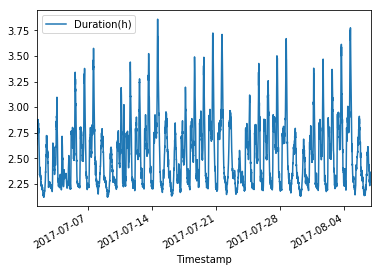

In [70]:
ax = data.plot(x='Timestamp',y='Duration(h)')

# Week by Week plots

Identify weeks in the dataset and plot them:

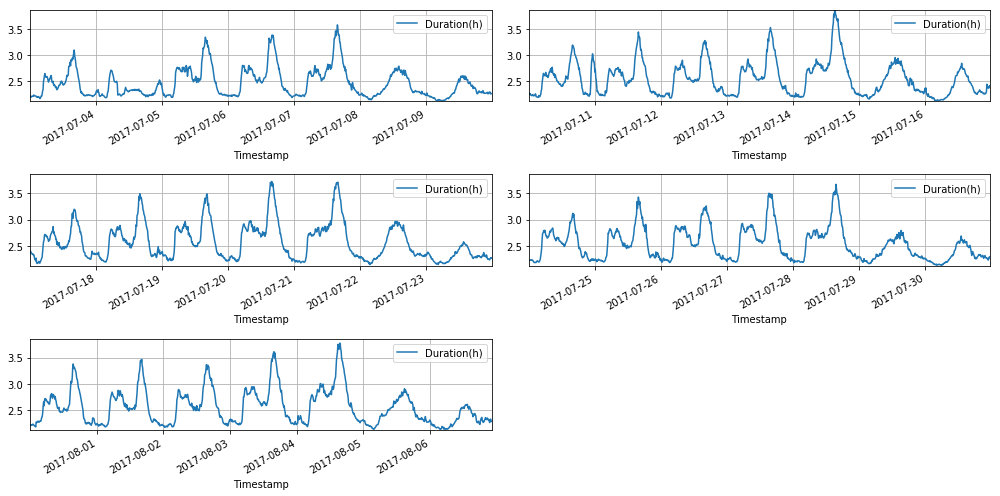

In [109]:
weeks = find_weeks(data)
num_cols = 2
num_rows = int(math.ceil(len(weeks) / float(num_cols)))
ylim = [min([min(data[week[0]:week[1]+1]['Duration(h)']) for week in weeks]), 
        max([max(data[week[0]:week[1]+1]['Duration(h)']) for week in weeks])]
plt.figure(1,figsize=(14, 7))
for e, week in enumerate(weeks):
    ax = plt.subplot(num_rows,num_cols,e+1)
    data.iloc[week[0]:week[1]].plot(x='Timestamp',y='Duration(h)',ax=ax)
    ax.grid()
    ax.set_ylim(ylim)
plt.tight_layout()

# Day plots

Pick a day to compare across weeks:

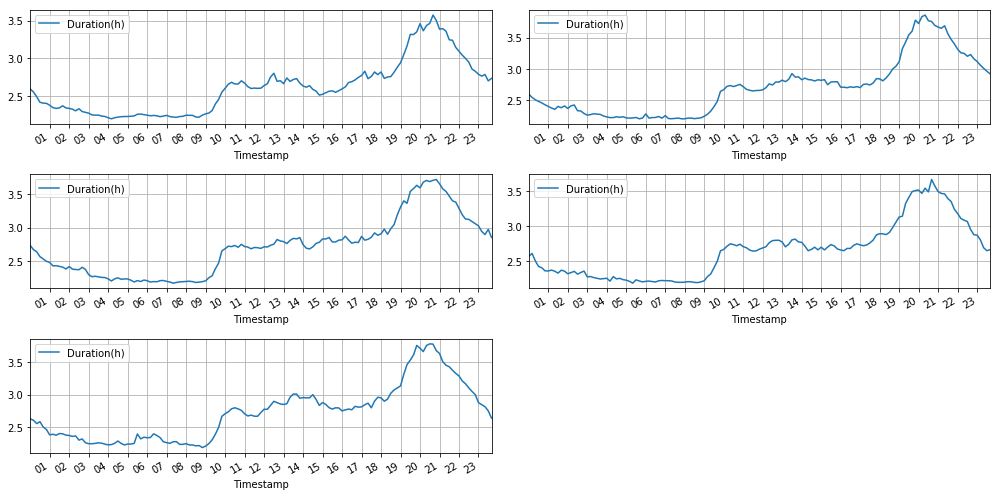

In [15]:
days = find_days(data,5)
num_cols = 2
num_rows = int(math.ceil(len(weeks) / float(num_cols)))
plt.figure(1,figsize=(14, 7))

for e, day in enumerate(days):
    ax = plt.subplot(num_rows,num_cols,e+1)
    data.iloc[day[0]:day[1]].plot(x='Timestamp',y='Duration(h)',ax=ax)
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H'))
    ax.xaxis.set_major_locator(dates.HourLocator(interval=1))
    ax.grid()

plt.tight_layout()

## Peak/valley detection

Detect highs and lows

In [23]:
from detect_peaks import detect_peaks

week = find_weeks(data)[0] # choose one week
indexes = detect_peaks(data[week[0]:week[1]]['Duration(h)'],mpd=20,mph=0.7,show=False)

print data[week[0]:week[1]]
for index in indexes:
    print index
# indexes = detect_peaks(durations,valley=True,mpd=130,show=True) # pick lowest time per day

# for index in indexes:
#     print times[index].strftime("%a %H:%M")

               Timestamp  Duration(s)  Duration(h)
194  2017-07-03 00:00:03         8028     2.230000
195  2017-07-03 00:10:02         8121     2.255833
196  2017-07-03 00:20:03         8097     2.249167
197  2017-07-03 00:30:04         8116     2.254444
198  2017-07-03 00:40:03         8141     2.261389
199  2017-07-03 00:50:02         8131     2.258611
200  2017-07-03 01:00:03         8120     2.255556
201  2017-07-03 01:10:01         8148     2.263333
202  2017-07-03 01:20:03         8166     2.268333
203  2017-07-03 01:30:04         8112     2.253333
204  2017-07-03 01:40:03         8117     2.254722
205  2017-07-03 01:50:03         8057     2.238056
206  2017-07-03 02:00:03         8114     2.253889
207  2017-07-03 02:10:02         8103     2.250833
208  2017-07-03 02:20:02         8128     2.257778
209  2017-07-03 02:30:03         8114     2.253889
210  2017-07-03 02:40:02         8159     2.266389
211  2017-07-03 02:50:02         8106     2.251667
212  2017-07-03 03:00:02       